<H1>Dataset Loading and Interaction Extraction</h1>

In [1]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [2]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [3]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [4]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2166 training examples
508 test examples


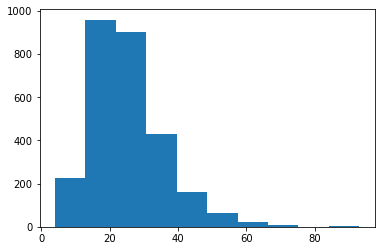

In [5]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))



trainSetRaw = [x for x in trainSetRaw if len(x.words)<=48]
testSetRaw = [x for x in testSetRaw if len(x.words)<=48]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [6]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    for interaction in example.interactions:
        #print(example.words)
        #print(interaction)        
        sentence = interaction[0] + " " + interaction[1] + " " + " ".join(example.words)
        #print(sentence)
        #print(type(sentence))
        trainSet = trainSet + [sentence]
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        #print()
        
print(len(trainSet))
print(len(trainLabel))

10238
10238


In [7]:
testSet = []
testLabel = []

for example in testSetRaw:
    for interaction in example.interactions:
        #print(example.words)
        #print(interaction)        
        sentence = interaction[0] + " " + interaction[1] + " " + " ".join(example.words)
        #print(sentence)
        #print(type(sentence))
        testSet = testSet + [sentence]
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        #print()
        
print(len(testSet))
print(len(testLabel))

2274
2274


In [8]:
for t in trainSet:
    print(t)
    print()

PROTEIN0 PROTEIN1 Cytokines measurements during PROTEIN0 treatment showed a trend to decreasing levels of PROTEIN1 at 4, 12, and 24 weeks.

PROTEIN0 PROTEIN1 Levels of PROTEIN0 were slightly increased following PROTEIN1 treatment (P = 0.09).

PROTEIN0 PROTEIN1 This study describes the distributions of PROTEIN0 as well as mRNAs for PROTEIN1 PROTEIN2 collagen types II PROTEIN3 and III PROTEIN4 in a growing "cartilage cap" of osteochondroma.

PROTEIN0 PROTEIN2 This study describes the distributions of PROTEIN0 as well as mRNAs for PROTEIN1 PROTEIN2 collagen types II PROTEIN3 and III PROTEIN4 in a growing "cartilage cap" of osteochondroma.

PROTEIN0 PROTEIN3 This study describes the distributions of PROTEIN0 as well as mRNAs for PROTEIN1 PROTEIN2 collagen types II PROTEIN3 and III PROTEIN4 in a growing "cartilage cap" of osteochondroma.

PROTEIN0 PROTEIN4 This study describes the distributions of PROTEIN0 as well as mRNAs for PROTEIN1 PROTEIN2 collagen types II PROTEIN3 and III PROTEIN4 in


PROTEIN0 PROTEIN7 PROTEIN0 is shown to interact with the largest subunit PROTEIN1 of human PROTEIN2 through its central region and with multiple activators--including PROTEIN3 PROTEIN4 PROTEIN5 PROTEIN6 adenoviral PROTEIN7 and human immunodeficiency virus-type 1 PROTEIN8 proteins--through a distinct amino-terminal domain.

PROTEIN0 PROTEIN8 PROTEIN0 is shown to interact with the largest subunit PROTEIN1 of human PROTEIN2 through its central region and with multiple activators--including PROTEIN3 PROTEIN4 PROTEIN5 PROTEIN6 adenoviral PROTEIN7 and human immunodeficiency virus-type 1 PROTEIN8 proteins--through a distinct amino-terminal domain.

PROTEIN1 PROTEIN2 PROTEIN0 is shown to interact with the largest subunit PROTEIN1 of human PROTEIN2 through its central region and with multiple activators--including PROTEIN3 PROTEIN4 PROTEIN5 PROTEIN6 adenoviral PROTEIN7 and human immunodeficiency virus-type 1 PROTEIN8 proteins--through a distinct amino-terminal domain.

PROTEIN1 PROTEIN3 PROTEI


PROTEIN1 PROTEIN2 In addition, PCR analysis of PROTEIN0 cells could not detect splicing of the extracellular domain of the cloned PROTEIN1 thereby excluding the possibility that the PROTEIN2 PROTEIN3 is a previously undescribed splice variant of the cloned PROTEIN4

PROTEIN1 PROTEIN3 In addition, PCR analysis of PROTEIN0 cells could not detect splicing of the extracellular domain of the cloned PROTEIN1 thereby excluding the possibility that the PROTEIN2 PROTEIN3 is a previously undescribed splice variant of the cloned PROTEIN4

PROTEIN1 PROTEIN4 In addition, PCR analysis of PROTEIN0 cells could not detect splicing of the extracellular domain of the cloned PROTEIN1 thereby excluding the possibility that the PROTEIN2 PROTEIN3 is a previously undescribed splice variant of the cloned PROTEIN4

PROTEIN2 PROTEIN3 In addition, PCR analysis of PROTEIN0 cells could not detect splicing of the extracellular domain of the cloned PROTEIN1 thereby excluding the possibility that the PROTEIN2 PROTEIN

PROTEIN0 PROTEIN2 Deletion analysis and binding studies demonstrate that a third enzyme, PROTEIN0 PROTEIN1 binds PROTEIN2 at a site distinct from those bound by PROTEIN3 or PROTEIN4

PROTEIN0 PROTEIN3 Deletion analysis and binding studies demonstrate that a third enzyme, PROTEIN0 PROTEIN1 binds PROTEIN2 at a site distinct from those bound by PROTEIN3 or PROTEIN4

PROTEIN0 PROTEIN4 Deletion analysis and binding studies demonstrate that a third enzyme, PROTEIN0 PROTEIN1 binds PROTEIN2 at a site distinct from those bound by PROTEIN3 or PROTEIN4

PROTEIN1 PROTEIN2 Deletion analysis and binding studies demonstrate that a third enzyme, PROTEIN0 PROTEIN1 binds PROTEIN2 at a site distinct from those bound by PROTEIN3 or PROTEIN4

PROTEIN1 PROTEIN3 Deletion analysis and binding studies demonstrate that a third enzyme, PROTEIN0 PROTEIN1 binds PROTEIN2 at a site distinct from those bound by PROTEIN3 or PROTEIN4

PROTEIN1 PROTEIN4 Deletion analysis and binding studies demonstrate that a third enzy


PROTEIN2 PROTEIN4 This effect is specific to PROTEIN0 and PROTEIN1 because other cytoskeletal proteins such as PROTEIN2 or PROTEIN3 do not affect PROTEIN4 activity.

PROTEIN3 PROTEIN4 This effect is specific to PROTEIN0 and PROTEIN1 because other cytoskeletal proteins such as PROTEIN2 or PROTEIN3 do not affect PROTEIN4 activity.

PROTEIN0 PROTEIN1 PROTEIN0 PROTEIN1 and PROTEIN2 define a family of PROTEIN3 essential for the rapid turnover of filamentous PROTEIN4 in vivo.

PROTEIN0 PROTEIN2 PROTEIN0 PROTEIN1 and PROTEIN2 define a family of PROTEIN3 essential for the rapid turnover of filamentous PROTEIN4 in vivo.

PROTEIN0 PROTEIN3 PROTEIN0 PROTEIN1 and PROTEIN2 define a family of PROTEIN3 essential for the rapid turnover of filamentous PROTEIN4 in vivo.

PROTEIN0 PROTEIN4 PROTEIN0 PROTEIN1 and PROTEIN2 define a family of PROTEIN3 essential for the rapid turnover of filamentous PROTEIN4 in vivo.

PROTEIN1 PROTEIN2 PROTEIN0 PROTEIN1 and PROTEIN2 define a family of PROTEIN3 essential for 


PROTEIN1 PROTEIN3 Purification of PROTEIN0 a 21,000 molecular weight PROTEIN1 from porcine kidney and identification of the PROTEIN2 site in the PROTEIN3 sequence.

PROTEIN2 PROTEIN3 Purification of PROTEIN0 a 21,000 molecular weight PROTEIN1 from porcine kidney and identification of the PROTEIN2 site in the PROTEIN3 sequence.

PROTEIN0 PROTEIN1 Analysis of V3, a hamster equivalent of SCID, indicates that the protein level increases of PROTEIN0 and PROTEIN1 from G0 to G1/S/G2 do not require PROTEIN2

PROTEIN0 PROTEIN2 Analysis of V3, a hamster equivalent of SCID, indicates that the protein level increases of PROTEIN0 and PROTEIN1 from G0 to G1/S/G2 do not require PROTEIN2

PROTEIN1 PROTEIN2 Analysis of V3, a hamster equivalent of SCID, indicates that the protein level increases of PROTEIN0 and PROTEIN1 from G0 to G1/S/G2 do not require PROTEIN2

PROTEIN0 PROTEIN1 In this study, cell cycle-dependent expression of human and rodent PROTEIN0 and PROTEIN1 proteins was monitored using two a


PROTEIN4 PROTEIN5 PROTEIN0 PROTEIN1 repeat 10 to the COOH terminus of PROTEIN2 is involved in binding to PROTEIN3 whereas PROTEIN4 interacts directly with the PROTEIN5 domain of PROTEIN6

PROTEIN4 PROTEIN6 PROTEIN0 PROTEIN1 repeat 10 to the COOH terminus of PROTEIN2 is involved in binding to PROTEIN3 whereas PROTEIN4 interacts directly with the PROTEIN5 domain of PROTEIN6

PROTEIN5 PROTEIN6 PROTEIN0 PROTEIN1 repeat 10 to the COOH terminus of PROTEIN2 is involved in binding to PROTEIN3 whereas PROTEIN4 interacts directly with the PROTEIN5 domain of PROTEIN6

PROTEIN0 PROTEIN1 Here we show that the PROTEIN0 subunit of the complex can be chemically cross-linked to the PROTEIN1 site of PROTEIN2

PROTEIN0 PROTEIN2 Here we show that the PROTEIN0 subunit of the complex can be chemically cross-linked to the PROTEIN1 site of PROTEIN2

PROTEIN1 PROTEIN2 Here we show that the PROTEIN0 subunit of the complex can be chemically cross-linked to the PROTEIN1 site of PROTEIN2

PROTEIN0 PROTEIN1 As a n

PROTEIN1 PROTEIN3 Disruption of the PROTEIN0 gene, which is homologous to PROTEIN1 PROTEIN2 and which is also required for correct PROTEIN3 localization, also blocks endocytosis.

PROTEIN2 PROTEIN3 Disruption of the PROTEIN0 gene, which is homologous to PROTEIN1 PROTEIN2 and which is also required for correct PROTEIN3 localization, also blocks endocytosis.

PROTEIN0 PROTEIN1 DNA sequence analysis of the PROTEIN0 gene reveals that it encodes PROTEIN1 an PROTEIN2 protein.

PROTEIN0 PROTEIN2 DNA sequence analysis of the PROTEIN0 gene reveals that it encodes PROTEIN1 an PROTEIN2 protein.

PROTEIN1 PROTEIN2 DNA sequence analysis of the PROTEIN0 gene reveals that it encodes PROTEIN1 an PROTEIN2 protein.

PROTEIN0 PROTEIN1 We attribute these effects to potential sequestration of PROTEIN0 monomers by PROTEIN1 when present in excess.

PROTEIN0 PROTEIN1 Double mutants containing N-terminal domain deletions of both PROTEIN0 PROTEIN1 and PROTEIN2 PROTEIN3 were inviable.

PROTEIN0 PROTEIN2 Double m

PROTEIN0 PROTEIN2 Immunofluorescence microscopy of cells grown on PROTEIN0 confirmed the presence of PROTEIN1 PROTEIN2 and PROTEIN3 at the ends of PROTEIN4 stress fibers at presumptive focal contacts in melanocytes.

PROTEIN0 PROTEIN3 Immunofluorescence microscopy of cells grown on PROTEIN0 confirmed the presence of PROTEIN1 PROTEIN2 and PROTEIN3 at the ends of PROTEIN4 stress fibers at presumptive focal contacts in melanocytes.

PROTEIN0 PROTEIN4 Immunofluorescence microscopy of cells grown on PROTEIN0 confirmed the presence of PROTEIN1 PROTEIN2 and PROTEIN3 at the ends of PROTEIN4 stress fibers at presumptive focal contacts in melanocytes.

PROTEIN1 PROTEIN2 Immunofluorescence microscopy of cells grown on PROTEIN0 confirmed the presence of PROTEIN1 PROTEIN2 and PROTEIN3 at the ends of PROTEIN4 stress fibers at presumptive focal contacts in melanocytes.

PROTEIN1 PROTEIN3 Immunofluorescence microscopy of cells grown on PROTEIN0 confirmed the presence of PROTEIN1 PROTEIN2 and PROTEIN3 


PROTEIN3 PROTEIN6 Here we demonstrate that growth arrest and differentiation of NT2/D1 cells induced by HMBA involve increased expression of the PROTEIN0 PROTEIN1 enhanced association of PROTEIN2 with PROTEIN3 PROTEIN4 complexes and suppression of PROTEIN5 activity associated to PROTEIN6 PROTEIN7 (but not to PROTEIN8 PROTEIN9

PROTEIN3 PROTEIN7 Here we demonstrate that growth arrest and differentiation of NT2/D1 cells induced by HMBA involve increased expression of the PROTEIN0 PROTEIN1 enhanced association of PROTEIN2 with PROTEIN3 PROTEIN4 complexes and suppression of PROTEIN5 activity associated to PROTEIN6 PROTEIN7 (but not to PROTEIN8 PROTEIN9

PROTEIN3 PROTEIN8 Here we demonstrate that growth arrest and differentiation of NT2/D1 cells induced by HMBA involve increased expression of the PROTEIN0 PROTEIN1 enhanced association of PROTEIN2 with PROTEIN3 PROTEIN4 complexes and suppression of PROTEIN5 activity associated to PROTEIN6 PROTEIN7 (but not to PROTEIN8 PROTEIN9

PROTEIN3 PRO

PROTEIN0 PROTEIN2 Interaction of PROTEIN0 with PROTEIN1 controls the association of apical PROTEIN2 in epithelial cells.

PROTEIN1 PROTEIN2 Interaction of PROTEIN0 with PROTEIN1 controls the association of apical PROTEIN2 in epithelial cells.

PROTEIN0 PROTEIN1 The quantity of the complex is reduced by treatment of Caco-2 cells with the alkylating agent N-ethylmaleimide which also has an inhibitory effect on the ability of PROTEIN0 to associate with PROTEIN1 in vitro.

PROTEIN0 PROTEIN1 In the PROTEIN0 assay system, silencing depends completely upon the function of the PROTEIN1 genes, known trans-acting regulators of the silent loci, and is sensitive to the gene dosage of two PROTEIN2 genes, PROTEIN3 and PROTEIN4

PROTEIN0 PROTEIN2 In the PROTEIN0 assay system, silencing depends completely upon the function of the PROTEIN1 genes, known trans-acting regulators of the silent loci, and is sensitive to the gene dosage of two PROTEIN2 genes, PROTEIN3 and PROTEIN4

PROTEIN0 PROTEIN3 In the P


PROTEIN1 PROTEIN8 Isolation and characterization of death domain PROTEIN0 PROTEIN1 PROTEIN2 PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 domain-containing proteins PROTEIN7 PROTEIN8 PROTEIN9 have partially bridged a large molecular gap within one of several signaling pathways which originate at the plasma membrane and terminate in the nucleus.

PROTEIN1 PROTEIN9 Isolation and characterization of death domain PROTEIN0 PROTEIN1 PROTEIN2 PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 domain-containing proteins PROTEIN7 PROTEIN8 PROTEIN9 have partially bridged a large molecular gap within one of several signaling pathways which originate at the plasma membrane and terminate in the nucleus.

PROTEIN2 PROTEIN3 Isolation and characterization of death domain PROTEIN0 PROTEIN1 PROTEIN2 PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 domain-containing proteins PROTEIN7 PROTEIN8 PROTEIN9 have partially bridged a large molecular gap within one of several signaling pathways which originate at the plasma membrane and 


PROTEIN2 PROTEIN3 PROTEIN0 PROTEIN1 phosphorylates PROTEIN2 an PROTEIN3 and regulates PROTEIN4 cytoskeletal reorganization.

PROTEIN2 PROTEIN4 PROTEIN0 PROTEIN1 phosphorylates PROTEIN2 an PROTEIN3 and regulates PROTEIN4 cytoskeletal reorganization.

PROTEIN3 PROTEIN4 PROTEIN0 PROTEIN1 phosphorylates PROTEIN2 an PROTEIN3 and regulates PROTEIN4 cytoskeletal reorganization.

PROTEIN0 PROTEIN1 Linkage between cancer susceptibility and the candidate DNA mismatch repair genes PROTEIN0 PROTEIN1 PROTEIN2 and PROTEIN3 PROTEIN4 was investigated.

PROTEIN0 PROTEIN2 Linkage between cancer susceptibility and the candidate DNA mismatch repair genes PROTEIN0 PROTEIN1 PROTEIN2 and PROTEIN3 PROTEIN4 was investigated.

PROTEIN0 PROTEIN3 Linkage between cancer susceptibility and the candidate DNA mismatch repair genes PROTEIN0 PROTEIN1 PROTEIN2 and PROTEIN3 PROTEIN4 was investigated.

PROTEIN0 PROTEIN4 Linkage between cancer susceptibility and the candidate DNA mismatch repair genes PROTEIN0 PROTEIN1 PR

PROTEIN0 PROTEIN1 PROTEIN0 which consists of a full length PROTEIN1 and a tagged tail, was isolated on the basis of the affinities for Nickel agarose and PROTEIN2

PROTEIN0 PROTEIN2 PROTEIN0 which consists of a full length PROTEIN1 and a tagged tail, was isolated on the basis of the affinities for Nickel agarose and PROTEIN2

PROTEIN1 PROTEIN2 PROTEIN0 which consists of a full length PROTEIN1 and a tagged tail, was isolated on the basis of the affinities for Nickel agarose and PROTEIN2

PROTEIN0 PROTEIN1 PROTEIN0 and PROTEIN1 expression in the vascular smooth muscle cells surrounding human endometrial arterioles.

PROTEIN0 PROTEIN1 PROTEIN0 prepared from chicken gizzard binds to PROTEIN1 in vitro.

PROTEIN0 PROTEIN1 Specific antibodies to PROTEIN0 isoforms PROTEIN1 PROTEIN2 PROTEIN3 PROTEIN4 and PROTEIN5 and cDNAs for PROTEIN6 were used.

PROTEIN0 PROTEIN2 Specific antibodies to PROTEIN0 isoforms PROTEIN1 PROTEIN2 PROTEIN3 PROTEIN4 and PROTEIN5 and cDNAs for PROTEIN6 were used.

PROTEI


PROTEIN1 PROTEIN3 The cellular morphological changes were analyzed and correlated with the distribution of cell-substratum contacts viewed by confocal images obtained after immunostaining with antibodies raised against the PROTEIN0 PROTEIN1 PROTEIN2 and PROTEIN3

PROTEIN2 PROTEIN3 The cellular morphological changes were analyzed and correlated with the distribution of cell-substratum contacts viewed by confocal images obtained after immunostaining with antibodies raised against the PROTEIN0 PROTEIN1 PROTEIN2 and PROTEIN3

PROTEIN0 PROTEIN1 The cellular transcription co-activators PROTEIN0 and the PROTEIN1 PROTEIN2 are cellular targets for transformation by the PROTEIN3 proteins of non-oncogenic adenovirus 5 (Ad5).

PROTEIN0 PROTEIN2 The cellular transcription co-activators PROTEIN0 and the PROTEIN1 PROTEIN2 are cellular targets for transformation by the PROTEIN3 proteins of non-oncogenic adenovirus 5 (Ad5).

PROTEIN0 PROTEIN3 The cellular transcription co-activators PROTEIN0 and the P


PROTEIN0 PROTEIN1 The high recombination levels seen in PROTEIN0 and PROTEIN1 mutants is dependent on the PROTEIN2 PROTEIN3 PROTEIN4 and PROTEIN5 genes.

PROTEIN0 PROTEIN2 The high recombination levels seen in PROTEIN0 and PROTEIN1 mutants is dependent on the PROTEIN2 PROTEIN3 PROTEIN4 and PROTEIN5 genes.

PROTEIN0 PROTEIN3 The high recombination levels seen in PROTEIN0 and PROTEIN1 mutants is dependent on the PROTEIN2 PROTEIN3 PROTEIN4 and PROTEIN5 genes.

PROTEIN0 PROTEIN4 The high recombination levels seen in PROTEIN0 and PROTEIN1 mutants is dependent on the PROTEIN2 PROTEIN3 PROTEIN4 and PROTEIN5 genes.

PROTEIN0 PROTEIN5 The high recombination levels seen in PROTEIN0 and PROTEIN1 mutants is dependent on the PROTEIN2 PROTEIN3 PROTEIN4 and PROTEIN5 genes.

PROTEIN1 PROTEIN2 The high recombination levels seen in PROTEIN0 and PROTEIN1 mutants is dependent on the PROTEIN2 PROTEIN3 PROTEIN4 and PROTEIN5 genes.

PROTEIN1 PROTEIN3 The high recombination levels seen in PROTEIN0 and PROTEI

PROTEIN1 PROTEIN4 To determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of PROTEIN0 PROTEIN1 PROTEIN2 the PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

PROTEIN1 PROTEIN5 To determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of PROTEIN0 PROTEIN1 PROTEIN2 the PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

PROTEIN1 PROTEIN6 To determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of PROTEIN0 PROTEIN1 PROTEIN2 the PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

PROTEIN2 PROTEIN3 To determine the relationship between


PROTEIN2 PROTEIN7 We describe the localization of PROTEIN0 and PROTEIN1 along the cell margins of mouse osteoblast-like cells, the colocalization of PROTEIN2 with PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 and the association of these complexes with the PROTEIN7 microfilaments.

PROTEIN3 PROTEIN4 We describe the localization of PROTEIN0 and PROTEIN1 along the cell margins of mouse osteoblast-like cells, the colocalization of PROTEIN2 with PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 and the association of these complexes with the PROTEIN7 microfilaments.

PROTEIN3 PROTEIN5 We describe the localization of PROTEIN0 and PROTEIN1 along the cell margins of mouse osteoblast-like cells, the colocalization of PROTEIN2 with PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 and the association of these complexes with the PROTEIN7 microfilaments.

PROTEIN3 PROTEIN6 We describe the localization of PROTEIN0 and PROTEIN1 along the cell margins of mouse osteoblast-like cells, the colocalization of PROTEIN2 with PROTE

PROTEIN5 PROTEIN7 Within 1 hour of raising the concentration of calcium ions, PROTEIN0 PROTEIN1 PROTEIN2 PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 appeared to accumulate at cell-cell borders, whereas the focal contact proteins, PROTEIN7 and PROTEIN8 did not.

PROTEIN5 PROTEIN8 Within 1 hour of raising the concentration of calcium ions, PROTEIN0 PROTEIN1 PROTEIN2 PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 appeared to accumulate at cell-cell borders, whereas the focal contact proteins, PROTEIN7 and PROTEIN8 did not.

PROTEIN6 PROTEIN7 Within 1 hour of raising the concentration of calcium ions, PROTEIN0 PROTEIN1 PROTEIN2 PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 appeared to accumulate at cell-cell borders, whereas the focal contact proteins, PROTEIN7 and PROTEIN8 did not.

PROTEIN6 PROTEIN8 Within 1 hour of raising the concentration of calcium ions, PROTEIN0 PROTEIN1 PROTEIN2 PROTEIN3 PROTEIN4 PROTEIN5 and PROTEIN6 appeared to accumulate at cell-cell borders, whereas the focal contact proteins, 

PROTEIN0 PROTEIN1 The first stage, which involves the phosphatase function of PROTEIN0 depends on the cell division protein PROTEIN1 and could correspond to the PROTEIN2 assembly of PROTEIN3 into E-rings.

PROTEIN0 PROTEIN2 The first stage, which involves the phosphatase function of PROTEIN0 depends on the cell division protein PROTEIN1 and could correspond to the PROTEIN2 assembly of PROTEIN3 into E-rings.

PROTEIN0 PROTEIN3 The first stage, which involves the phosphatase function of PROTEIN0 depends on the cell division protein PROTEIN1 and could correspond to the PROTEIN2 assembly of PROTEIN3 into E-rings.

PROTEIN1 PROTEIN2 The first stage, which involves the phosphatase function of PROTEIN0 depends on the cell division protein PROTEIN1 and could correspond to the PROTEIN2 assembly of PROTEIN3 into E-rings.

PROTEIN1 PROTEIN3 The first stage, which involves the phosphatase function of PROTEIN0 depends on the cell division protein PROTEIN1 and could correspond to the PROTEIN2 assemb

<H1>Imports</h1>

In [9]:
import os
import re
import time
import numpy as np
import tensorflow as tf
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


from keras import regularizers

from keras.models import Sequential, Model

from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Lambda
from keras.layers.merge import concatenate


from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.optimizers import SGD, Adam, RMSprop



import spacy
import scispacy
import nltk


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

nlp = spacy.load("en_core_sci_sm")


C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-

<h1>Preprocessing Functions</h1>

In [10]:
def word2vec(x):
    return nlp(x).vector

In [11]:
def padWithZeroes(matrix,rows,cols):
    result = np.zeros((rows,96))
    result[:matrix.shape[0],:matrix.shape[1]] = matrix
    return result


matrix = np.random.rand(11,96)

padded = padWithZeroes(matrix,50,96)

print(padded.shape)



(50, 96)


In [12]:
#A GENERAL FUNCTION TO TAKE STRINGS AND CLEAN, SPLIT AND CONVERT TO NUMPY ARRAY
def processString(sentence,maxWords):
    text=sentence.lower()
    tokens = nltk.word_tokenize(text)
    #punctuation
    #origina: tokens=nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(text)
    tokens=nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(text)
    stopwords=set(nltk.corpus.stopwords.words('english'))
    tokens=list(filter(lambda word: not word in stopwords,tokens))
    #lemmatize
    #tokens = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in tokens]
    #stemming
    #tokens = [nltk.stem.SnowballStemmer('english').stem(word) for word in tokens]
    #return word2vec( ' '.join(tokens) )
    
    result = np.array(list(map(word2vec, tokens)))
    if len(tokens)<=maxWords:    
        result = padWithZeroes(result,maxWords,result.shape[1])
    
    '''
    for token in tokens:
        if 'result' in locals():
            result = np.concatenate((result,[word2vec(token)]),axis=0)
        else:
            result = [word2vec(token)]
    
    result = padWithZeroes(result,maxWords,result.shape[1])
    '''
    
    #result = ' '.join(tokens) 
    return result
    

stringToClean="being anne:the hero's nests' has - apples/pears,bears, and\cats. which-way or does she? she's a fiend! (everything i<br />i a)"

resultVectors=processString(stringToClean,50)

print(type(resultVectors))
#print(resultVectors)
print(resultVectors.shape)




<class 'numpy.ndarray'>
(50, 96)


<h1>Embedding</h1>

In [13]:
def eliminateOverMaxWordExamples(dataset,labels,maxWords):

    aboveWordLimitIndex = []

    for index,value in enumerate(dataset):
        if value.shape[0]>50:
            print(index)
            print(value.shape)
            aboveWordLimitIndex +=[index]

    dataset = [t for t in dataset if t.shape[0]<=50]

    labels = [v for i,v in enumerate(labels) if i not in aboveWordLimitIndex]
    
    return dataset, labels
'''
t,l = eliminateOverMaxWordExamples(trainSet,trainLabel,50)

print(len(trainSet),len(trainLabel))


print(len(t),len(l))

'''

'\nt,l = eliminateOverMaxWordExamples(trainSet,trainLabel,50)\n\nprint(len(trainSet),len(trainLabel))\n\n\nprint(len(t),len(l))\n\n'

In [14]:
if os.path.isfile('padded_training_docs50.npy') and os.path.isfile('trainLabel50.npy'):
    padded_training_docs = np.load('padded_training_docs50.npy')
    trainLabel = np.load('trainLabel50.npy')
else:
    trainSet = [processString(t,50) for t in trainSet]
    #padded_training_docs = [t for t in trainSet if t.shape[0]<=50]
    padded_training_docs, trainLabel = eliminateOverMaxWordExamples(trainSet,trainLabel,50)
    np.save('padded_training_docs50.npy', padded_training_docs)
    np.save('trainLabel50.npy', trainLabel)
    
if os.path.isfile('padded_test_docs50.npy') and os.path.isfile('testLabel50.npy'):
    padded_test_docs = np.load('padded_test_docs50.npy')
    testLabel = np.load('testLabel50.npy')
else:
    testSet = [processString(t,50) for t in testSet]
    #padded_test_docs = [t for t in testSet if t.shape[0]<=50]
    padded_test_docs, testLabel = eliminateOverMaxWordExamples(testSet,testLabel,50)
    np.save('padded_test_docs50.npy', padded_test_docs)
    np.save('testLabel50.npy', testLabel)
    
    


In [15]:
padded_training_docs = np.array(padded_training_docs)
trainLabel = np.array(trainLabel)
padded_test_docs = np.array(padded_test_docs)
testLabel = np.array(testLabel)

In [16]:
print("done")
print(len(padded_training_docs),len(trainLabel))
print(len(padded_test_docs),len(testLabel))

done
10235 10235
2274 2274


<h1>Functional API</h1>

In [17]:
epochs_to_run = 300
callbackImprovementPercentage = 0.000001
patienceEpochs = 5 
whatToMonitor = 'val_accuracy'

In [18]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = 50
wordvec_length = 96


input_layer = Input(shape=(sentence_length,wordvec_length))

#x = Embedding(input_dim=vocab_size, output_dim=wordvec_length, weights=[embedding_matrix],  trainable=True)(input_layer)

#x = Conv1D(filters = 1, kernel_size = 64, strides=1, padding='same', use_bias=False)(input_layer)

#x = big_block(x)

#x = GlobalMaxPooling1D()(x)

x = Flatten()(input_layer)

x = Dense(2000, activation='sigmoid')(x)

x = Dense(1000, activation='sigmoid')(x)

x = Dense(500, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

dense_model = Model(inputs = input_layer, outputs = output_layer)

dense_model.summary()


#compile
dense_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
dense_model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
loss, accuracy = dense_model.evaluate(padded_training_docs, trainLabel, verbose=1)
print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
loss, accuracy = dense_model.evaluate(padded_test_docs, testLabel, verbose=1)
print('Test Accuracy: %f' % (accuracy*100))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 96)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4800)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              9602000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1005

c:\users\frost\anaconda3\envs\tf_gpu\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


10235/10235 [==============================] - 5s 492us/step - loss: 0.6032 - accuracy: 0.7104
Epoch 3/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.6027 - accuracy: 0.7104
Epoch 4/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.6028 - accuracy: 0.7104
Epoch 5/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.6024 - accuracy: 0.7104
Epoch 6/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.6025 - accuracy: 0.7104
Epoch 7/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.6027 - accuracy: 0.71040s - loss: 0.6032 - accuracy
Epoch 8/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.5997 - accuracy: 0.7104
Epoch 9/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.5913 - accuracy: 0.7104
Epoch 10/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.5816 - accuracy: 0.71040s - loss: 0.5802 - a

10235/10235 [==============================] - 5s 490us/step - loss: 0.3827 - accuracy: 0.8283
Epoch 77/300
10235/10235 [==============================] - 5s 493us/step - loss: 0.3722 - accuracy: 0.8346
Epoch 78/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.3770 - accuracy: 0.8293
Epoch 79/300
10235/10235 [==============================] - 5s 493us/step - loss: 0.3792 - accuracy: 0.8289
Epoch 80/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.3670 - accuracy: 0.8329
Epoch 81/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.3773 - accuracy: 0.8257
Epoch 82/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.3769 - accuracy: 0.8292
Epoch 83/300
10235/10235 [==============================] - 5s 493us/step - loss: 0.3688 - accuracy: 0.8306
Epoch 84/300
10235/10235 [==============================] - 5s 490us/step - loss: 0.3664 - accuracy: 0.8376
Epoch 85/300
10235/10235 [===============

10235/10235 [==============================] - 5s 492us/step - loss: 0.2636 - accuracy: 0.8859
Epoch 151/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.2707 - accuracy: 0.8814
Epoch 152/300
10235/10235 [==============================] - 5s 490us/step - loss: 0.2757 - accuracy: 0.8791
Epoch 153/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.2519 - accuracy: 0.8879
Epoch 154/300
10235/10235 [==============================] - 5s 493us/step - loss: 0.2700 - accuracy: 0.8835
Epoch 155/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.2671 - accuracy: 0.8808
Epoch 156/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.2626 - accuracy: 0.8830
Epoch 157/300
10235/10235 [==============================] - 5s 490us/step - loss: 0.2680 - accuracy: 0.8853
Epoch 158/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.2687 - accuracy: 0.8819
Epoch 159/300
10235/10235 [======

10235/10235 [==============================] - 5s 487us/step - loss: 0.2348 - accuracy: 0.8981
Epoch 225/300
10235/10235 [==============================] - 5s 489us/step - loss: 0.2477 - accuracy: 0.8958
Epoch 226/300
10235/10235 [==============================] - 5s 492us/step - loss: 0.2328 - accuracy: 0.9010
Epoch 227/300
10235/10235 [==============================] - 5s 489us/step - loss: 0.2145 - accuracy: 0.9076
Epoch 228/300
10235/10235 [==============================] - 5s 489us/step - loss: 0.2156 - accuracy: 0.9065
Epoch 229/300
10235/10235 [==============================] - 5s 489us/step - loss: 0.2276 - accuracy: 0.9028
Epoch 230/300
10235/10235 [==============================] - 5s 489us/step - loss: 0.2283 - accuracy: 0.9020
Epoch 231/300
10235/10235 [==============================] - 5s 489us/step - loss: 0.2266 - accuracy: 0.8990
Epoch 232/300
10235/10235 [==============================] - 5s 489us/step - loss: 0.2235 - accuracy: 0.9018
Epoch 233/300
10235/10235 [======

10235/10235 [==============================] - 5s 489us/step - loss: 0.2160 - accuracy: 0.9057
Epoch 300/300
10235/10235 [==============================] - 5s 489us/step - loss: 0.2150 - accuracy: 0.9093

Training done in 25.132305618127187 minutes or 1507.9383370876312 seconds now evaluating...

10235/10235 [==============================] - 1s 82us/step
Training Accuracy: 92.125058

2274/2274 [==============================] - 0s 89us/step
Test Accuracy: 69.437116


In [19]:
#https://keras.io/getting-started/functional-api-guide/

sentence_length = 50
wordvec_length = 96


input_layer = Input(shape=(sentence_length,wordvec_length))

#x = Embedding(input_dim=vocab_size, output_dim=wordvec_length, weights=[embedding_matrix],  trainable=True)(input_layer)

#x = Conv1D(filters = 1, kernel_size = 64, strides=1, padding='same', use_bias=False)(input_layer)

#x = big_block(x)

#x = GlobalMaxPooling1D()(x)

#conv_model.add(Conv2D (kernel_size = (5,5), strides = 5, filters = 20, input_shape=(100,100,1), activation='relu'))
#conv_model.add(Conv2D (kernel_size = (5,5), strides = 5, filters = 4,  activation='relu'))

x = Reshape((sentence_length, wordvec_length,1), input_shape=(sentence_length,wordvec_length))(input_layer)

x = Conv2D (kernel_size = (3,3), strides = 3, filters = 100,  activation='relu')(x)

x = Conv2D (kernel_size = (4,4), strides = 4, filters = 200,  activation='relu')(x)

x = Conv2D (kernel_size = (4,8), strides = 8, filters = 400,  activation='relu')(x)

x = GlobalMaxPooling2D()(x)

x = Dense(400, activation='sigmoid')(x)

x = Dense(200, activation='sigmoid')(x)

x = Dense(100, activation='sigmoid')(x)

x = Dense(50, activation='sigmoid')(x)

x = Dense(25, activation='sigmoid')(x)

x = Dense(10, activation='sigmoid')(x)

x = Dense(5, activation='sigmoid')(x)

output_layer = Dense(1, activation='sigmoid')(x)

cnn_2d_model = Model(inputs = input_layer, outputs = output_layer)

cnn_2d_model.summary()


#compile
cnn_2d_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print()
print("Starting training...")
print()

early_stop = EarlyStopping(monitor=whatToMonitor, 
                           min_delta=callbackImprovementPercentage, #apparently percentage
                           patience=patienceEpochs, 
                           mode='min', 
                           verbose=1)



start = time.time()

# fit the model
cnn_2d_model.fit(padded_training_docs, trainLabel, epochs=epochs_to_run, verbose=1,callbacks        = [early_stop])

durationSecond = time.time()-start

print()
print("Training done in",durationSecond/60,"minutes or",durationSecond,"seconds now evaluating...")
print()



# evaluate the model
loss, accuracy = cnn_2d_model.evaluate(padded_training_docs, trainLabel, verbose=1)
print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
loss, accuracy = cnn_2d_model.evaluate(padded_test_docs, testLabel, verbose=1)
print('Test Accuracy: %f' % (accuracy*100))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50, 96)            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 50, 96, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 32, 100)       1000      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 8, 200)         320200    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 400)         2560400   
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 400)               1604

10235/10235 [==============================] - 5s 475us/step - loss: 0.5838 - accuracy: 0.71020s - loss: 0.5837 - accuracy: 0.71
Epoch 55/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5839 - accuracy: 0.7110
Epoch 56/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5837 - accuracy: 0.7117
Epoch 57/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5840 - accuracy: 0.7101
Epoch 58/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5837 - accuracy: 0.7096
Epoch 59/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5844 - accuracy: 0.7104
Epoch 60/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5840 - accuracy: 0.7087
Epoch 61/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5839 - accuracy: 0.7076
Epoch 62/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5838 - accuracy: 0.7101
Epoch 6

10235/10235 [==============================] - 5s 475us/step - loss: 0.5831 - accuracy: 0.7099
Epoch 129/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5830 - accuracy: 0.70860s - loss: 0.5831 - accuracy: 
Epoch 130/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5829 - accuracy: 0.7103
Epoch 131/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5831 - accuracy: 0.7085
Epoch 132/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5830 - accuracy: 0.7101
Epoch 133/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5831 - accuracy: 0.7097
Epoch 134/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5831 - accuracy: 0.7099
Epoch 135/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5830 - accuracy: 0.7103
Epoch 136/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5831 - accuracy: 0.7090
Epo

10235/10235 [==============================] - 5s 473us/step - loss: 0.5829 - accuracy: 0.7109
Epoch 203/300
10235/10235 [==============================] - 5s 476us/step - loss: 0.5830 - accuracy: 0.7097
Epoch 204/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5829 - accuracy: 0.7105
Epoch 205/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5829 - accuracy: 0.70960s - loss: 0.5838 - accura
Epoch 206/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5827 - accuracy: 0.7083
Epoch 207/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5829 - accuracy: 0.7085
Epoch 208/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5828 - accuracy: 0.7097
Epoch 209/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5827 - accuracy: 0.7095
Epoch 210/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5828 - accuracy: 0.7112
Epoch 2

Epoch 276/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5827 - accuracy: 0.7113
Epoch 277/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5829 - accuracy: 0.7086
Epoch 278/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5827 - accuracy: 0.7089
Epoch 279/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5829 - accuracy: 0.7076
Epoch 280/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5828 - accuracy: 0.7111
Epoch 281/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5828 - accuracy: 0.7102
Epoch 282/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5828 - accuracy: 0.7085
Epoch 283/300
10235/10235 [==============================] - 5s 475us/step - loss: 0.5827 - accuracy: 0.7085
Epoch 284/300
10235/10235 [==============================] - 5s 473us/step - loss: 0.5828 - accuracy: 0.7120
Epoch 285/300
10235

In [20]:
print()
print()
print('First Network')
print()


# evaluate the model
loss, accuracy = dense_model.evaluate(padded_training_docs, trainLabel, verbose=1)
print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
loss, accuracy = dense_model.evaluate(padded_test_docs, testLabel, verbose=1)
print('Test Accuracy: %f' % (accuracy*100))


print()
print()
print('Second Network')
print()


# evaluate the model
loss, accuracy = cnn_2d_model.evaluate(padded_training_docs, trainLabel, verbose=1)
print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model
loss, accuracy = cnn_2d_model.evaluate(padded_test_docs, testLabel, verbose=1)
print('Test Accuracy: %f' % (accuracy*100))



print()
print()
print('Third Network')
print()





First Network

10235/10235 [==============================] - 1s 82us/step
Training Accuracy: 92.125058

2274/2274 [==============================] - 0s 82us/step
Test Accuracy: 69.437116


Second Network

10235/10235 [==============================] - 1s 121us/step
Training Accuracy: 71.040547

2274/2274 [==============================] - 0s 124us/step
Test Accuracy: 72.647315


Third Network

